# Fake News Classifier Project

### By Phelipe Martins

In [136]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
#Evaluate model performance.
from sklearn import metrics

import matplotlib.pyplot as plt
import numpy as np
import itertools

In [137]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    

In [138]:
#import the fake news .csv
df = pd.read_csv("C:\\Users\\pheli\\Documents\\fake_or_real_news.csv")

In [139]:
#prints the shape of the dataframe
df.shape

(6335, 4)

In [140]:
#changing column names...
df.columns = ['id', 'title', 'text', 'label']
#set the index of the dataframe
df = df.set_index("id")
#sorting by the first column...
df = df.sort_values(by=['id'])
#prints the first lines of the dataframe
df.head()

,title,text,label
id,,,
2,Study: women had to drive 4 times farther afte...,Ever since Texas laws closed about half of the...,REAL
3,"Trump, Clinton clash in dueling DC speeches","Donald Trump and Hillary Clinton, now at the s...",REAL
5,"As Reproductive Rights Hang In The Balance, De...",WASHINGTON -- Forty-three years after the Supr...,REAL
6,"Despite Constant Debate, Americans' Abortion O...",It's been a big week for abortion news.\n\nCar...,REAL
7,Obama Argues Against Goverment Shutdown Over P...,President Barack Obama said Saturday night tha...,REAL


## Obs.: Check for others preprocessing steps beyond stop_words!

In [141]:
y = df.label

#getting the training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size =0.33, random_state=53)

#count_vectorizer will turn texts into a bag-of-words vector. 
#as a preprocessing step, the stop word will be removing(such as 'a', 'about', 'an', 'and', 'any', 'do' and so on). 
count_vectorizer = CountVectorizer(stop_words='english')

#will generate a mapping of words with ids and vectors representing
#how many times each word appears in the news.
#learn the vocabulary dictionary and return term-document matrix.
#X_train.values shows only the texts.
count_train = count_vectorizer.fit_transform(X_train.values)

#transform documents to document-term matrix.
count_test = count_vectorizer.transform(X_test)

In [142]:
print(count_vectorizer.get_feature_names())

['00', '000', '0000', '000000031', '00006', '0001', '000billion', '000ft', '000km', '000x', '001', '002', '003', '004', '005', '006', '00684', '006s', '007s', '008', '008s', '009', '0099', '00am', '00p', '01', '010', '012', '013c2812c9', '014', '016', '018', '02', '020', '022', '023', '024', '027', '02714', '028', '02870', '03', '030', '031', '032', '0325', '033', '034', '035', '037', '03747', '039', '03eb', '04', '040', '042', '044', '048', '049', '05', '050', '0509245d29', '053', '056', '06', '0600', '062', '063', '0640', '066', '068', '07', '0700', '075', '0750', '076', '079', '07dryempjx', '08', '080', '082', '084', '0851', '089', '09', '093', '098263', '09am', '09pm', '0_65b67362bd', '0_jgdktlmn', '0_kvyhphja', '0a_merrill', '0d', '0fjjvowyhg8qtskiz', '0h4at2yetra17uxetni02ls2jeg0mty45jrcu7mrzsrpcbq464i', '0hour', '0hq3vb2giv', '0oeekvljlt', '0t5', '0txrbwvobzz4fi5nksw6k5a6cxzbb3juxthmdiz93cby8gvrqiypzhajvjnt2', '0x', '10', '100', '1000', '10000s', '10009020', '1000s', '1001', '10

In [143]:
print(count_train.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Using Naive Bayes classifier

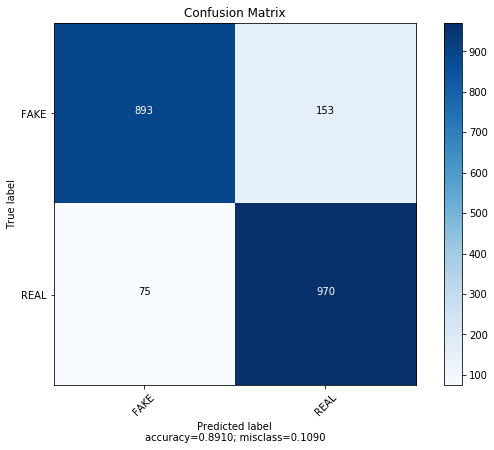

In [147]:
nb_classifier = MultinomialNB()

nb_classifier.fit(count_train, y_train)

#this will determine the internal parameters based on the dataset.
nb_classifier.fit(count_train, y_train)

#this will use the trained model to predict the label based on the test data vectors.
pred = nb_classifier.predict(count_test)

#to further evaluate our model, we can also check the confusion matrix which shows correct
#and incorrect labels.
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm=cm, normalize=False, target_names=['FAKE', 'REAL'], title = 'Confusion Matrix')